In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

# Q 4.6

In [4]:
data = pd.read_csv('Data/stature_Turkey.csv')
data

,Stature,Hand,Gender
0,169.1,204.7,Female
1,164.3,204.9,Female
2,162.8,191.9,Female
3,162.4,191.9,Female
4,170.5,207.8,Female
...,...,...,...
150,177.7,221.2,Male
151,163.6,189.1,Male
152,184.4,226.3,Male
153,182.7,221.6,Male


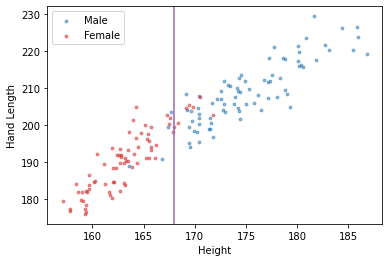

In [5]:
x = np.array(data[['Stature', 'Hand']])
y = np.array(data['Gender'].replace(['Female', 'Male'], [1, 0]))

plt.scatter(*x[y==0].T, s=8, alpha=0.5, label='Male', color='tab:blue')
plt.scatter(*x[y==1].T, s=8, alpha=0.5, label='Female', color='tab:red')
plt.axvline(168, color='tab:purple')
plt.ylabel('Hand Length')
plt.xlabel('Height')
plt.legend()
plt.show()

(b) Using software, fit a logistic regression on an indicator variable for “female” on height and hand length. 

In [6]:
clf = sklearn.linear_model.LogisticRegression()
clf.fit(x, y)
clf.coef_

array([[-1.08520342,  0.16636073]])

Here the first parameter is the Stature indicating a $\beta_1=-1.0852$ and for Hand we get $\beta_2=0.1664$

(c) Using software, create a scatter plot of $x_1$ vs $x_2$, where the plotting symbol is whether or not the person is female. Add the decision boundary from the logistic regression to this plot.

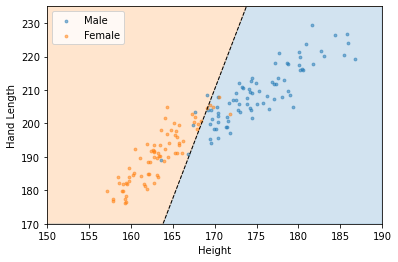

In [7]:
b = clf.intercept_[0]
w1, w2 = clf.coef_.T
c = -b/w2
m = -w1/w2

xmin, xmax = 150, 190
ymin, ymax = 170, 235
xd = np.array([xmin, xmax])
yd = m*xd + c
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, ymin, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, ymax, color='tab:orange', alpha=0.2)

plt.scatter(*x[y==0].T, s=8, alpha=0.5, label='Male')
plt.scatter(*x[y==1].T, s=8, alpha=0.5, label='Female')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
plt.ylabel('Hand Length')
plt.xlabel('Height')
plt.legend()

plt.show()

(d) Does a smaller height make it more likely the gender is female? Interpret the coefficient, if appropriate. 

Ans: A decrease in height causes an increase in log odds ratio of Female to Male. Therefore, it is more likely for it to be a female with a smaller height. i.e., a decrease in 1 cm of height causes an increase of 1.0852 of log odds ratio.

(e) Does a smaller hand length make it more likely the gender is female? Interpret the coefficient, if appropriate. 

Ans: A decrease in hand length causes a decrease in log odds ratio of Female to Male. Therefore, it is less likely that the gender is female. i.e. a decrease in 1 mm of arm's length causes an increase of 0.1664 of log odds ratio.